In [75]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D


In [76]:
from math import tanh, cos, sin

model = [44.798,       #mb
	2.485,             #mw
	0.055936595310797, #Jw
	-0.02322718759275, #a2
	0.166845864363019, #c2
	3.604960049044268, #A2
	3.836289730154863, #B2
	1.069672194414735, #C2
	1.261650363363571, #K
	0.195,             #r
	0.5,               #L
	9.81,              #gGravity
	0.,                #FricCoeff 3.185188257847262
	1.0e-3,            #velEps
	1.225479467549329  #FricCoeff 1.225479467549329 
	]


def dynamics(X):

	f_drift = np.zeros((len(X),1))
	g_input_matrix = np.zeros((len(X),2))

	Fric = X[3] - X[6] * model[9]
	Fric = model[12] * tanh(Fric / model[13]) + model[14] * Fric
	a_tmp = cos(X[5])
	b_a_tmp = sin(X[5])
	f_drift[0] = X[3] * cos(X[2])
	f_drift[1] = X[3] * sin(X[2])
	f_drift[2] = X[4]
	f_tmp = model[3] * model[3]
	b_f_tmp = model[9] * model[9]
	c_f_tmp = model[4] * model[4]
	d_f_tmp = model[0] * model[0]
	e_f_tmp = 4.0 * f_tmp
	f_f_tmp = 4.0 * c_f_tmp
	g_f_tmp = X[4] * X[4]
	h_f_tmp = X[6] * X[6]
	i_f_tmp = 4.0 * h_f_tmp + 3.0 * g_f_tmp
	j_f_tmp = cos(2.0 * X[5])
	k_f_tmp = cos(3.0 * X[5])
	l_f_tmp = pow(model[3], 3.0)
	m_f_tmp = 4.0 * model[6] * model[4] * model[0]
	n_f_tmp = pow(model[4], 3.0)
	o_f_tmp = sin(2.0 * X[5])
	p_f_tmp = model[5] * model[4] * model[0] * model[9] * g_f_tmp
	q_f_tmp = -model[4] * model[7] * model[0] * model[9] * g_f_tmp
	r_f_tmp = sin(3.0 * X[5])
	s_f_tmp = 3.0 * f_tmp * model[4] * d_f_tmp * model[9] * g_f_tmp
	t_f_tmp = -4.0 * model[3] * model[4]
	u_f_tmp = 2.0 * model[3] * model[4]
	v_f_tmp = f_tmp * d_f_tmp
	f_tmp_tmp = v_f_tmp * b_f_tmp
	b_f_tmp_tmp = c_f_tmp * d_f_tmp * b_f_tmp
	f_f_tmp = 1.0 / ((((((((((4.0 * model[6] * model[2] + e_f_tmp * model[2] *
		model[0]) + f_f_tmp * model[2] * model[0]) + 2.0 * model[6] * model[0] *
	b_f_tmp) + f_tmp_tmp) + b_f_tmp_tmp) + 4.0 * model[6] * model[1] * b_f_tmp)
	+ e_f_tmp * model[0] * model[1] * b_f_tmp) + f_f_tmp *
	model[0] * model[1] * b_f_tmp) + (f_tmp + -c_f_tmp) *
	d_f_tmp * b_f_tmp * j_f_tmp) + u_f_tmp * d_f_tmp * b_f_tmp *
	o_f_tmp)
	w_f_tmp = 2.0 * f_tmp
	f_drift[3] = 0.5 * model[9] * f_f_tmp * (((((((((((((((((((((((-8.0 * model[6] *
		Fric + -8.0 * f_tmp * Fric * model[0]) + -8.0 * c_f_tmp * Fric * model[0]) +
	model[0] * model[9] * ((((-8.0 * model[4] * Fric + model[3] * (-model[5] +
		model[7]) * g_f_tmp) + 4.0 * model[3] * model[6] * (h_f_tmp + g_f_tmp)) +
	l_f_tmp * model[0] * i_f_tmp) + model[3] * c_f_tmp * model[0] * i_f_tmp) *
	a_tmp) + t_f_tmp * model[11] * d_f_tmp * model[9] * j_f_tmp) + model[3] *
	model[5] * model[0] * model[9] * g_f_tmp * k_f_tmp) + -model[3] * model[7] *
	model[0] * model[9] * g_f_tmp * k_f_tmp) + l_f_tmp * d_f_tmp * model[9] *
	g_f_tmp * k_f_tmp) + -3.0 * model[3] * c_f_tmp * d_f_tmp * model[9] *
	g_f_tmp * k_f_tmp) + 8.0 * model[3] * Fric * model[0] * model[9] * b_a_tmp)
	+ m_f_tmp * h_f_tmp * model[9] * b_a_tmp) + e_f_tmp * model[4] * d_f_tmp *
	h_f_tmp * model[9] * b_a_tmp) + 4.0 * n_f_tmp * d_f_tmp * h_f_tmp * model[9]
	* b_a_tmp) + p_f_tmp * b_a_tmp) + m_f_tmp * model[9] * g_f_tmp * b_a_tmp) +
	q_f_tmp * b_a_tmp) + s_f_tmp * b_a_tmp) + 3.0 * n_f_tmp * d_f_tmp * model[9]
	* g_f_tmp * b_a_tmp) + w_f_tmp * model[11] * d_f_tmp * model[9] * o_f_tmp) +
	-2.0 * c_f_tmp * model[11] * d_f_tmp * model[9] * o_f_tmp) + p_f_tmp *
	r_f_tmp) + q_f_tmp * r_f_tmp) + s_f_tmp * r_f_tmp) + -n_f_tmp * d_f_tmp *
	model[9] * g_f_tmp * r_f_tmp)
	e_f_tmp = model[10] * model[10]
	i_f_tmp = -2.0 * f_tmp
	k_f_tmp = 2.0 * c_f_tmp
	l_f_tmp = i_f_tmp * model[0]
	m_f_tmp = k_f_tmp * model[0]
	n_f_tmp = f_tmp * model[0]
	c_f_tmp *= model[0]
	p_f_tmp = model[4] * model[0]
	q_f_tmp = model[2] * e_f_tmp
	e_f_tmp *= model[1]
	r_f_tmp = 2.0 * (model[7] + n_f_tmp)
	s_f_tmp = 2.0 * (model[5] + c_f_tmp)
	u_f_tmp *= model[0]
	f_drift[4] = b_f_tmp * X[4] * ((-2.0 * model[3] * model[0] * X[3] * a_tmp + t_f_tmp *
			model[0] * X[6] * j_f_tmp) + -2.0 * (p_f_tmp * X[3] + (((model[5] + -model[7])
			+ l_f_tmp) + m_f_tmp) * X[6] * a_tmp) * b_a_tmp) * (1.0 / ((((q_f_tmp +
			e_f_tmp * b_f_tmp) + r_f_tmp * b_f_tmp * (a_tmp * a_tmp)) + s_f_tmp *
			b_f_tmp * (b_a_tmp * b_a_tmp)) + u_f_tmp * b_f_tmp * o_f_tmp))
	f_drift[5] = X[6]
	t_f_tmp = 4.0 * model[4] * model[11]
	k_f_tmp = k_f_tmp * model[2] * model[0]
	m_f_tmp = m_f_tmp * model[1] * b_f_tmp
	x_f_tmp = -(model[4] * model[4]) * d_f_tmp
	f_drift[6] = f_f_tmp * ((((((((((((((((((((8.0 * Fric * model[2] + 4.0 * Fric *
			model[0] * b_f_tmp) + 8.0 * Fric * model[1] * b_f_tmp) + 2.0 * model[0] *
			(2.0 * model[4] * Fric * model[9] + model[3] * model[11] * (2.0 * model[2] +
			(model[0] + 2.0 * model[1]) * b_f_tmp)) * a_tmp) + -2.0 * model[3] * model[4]
			* model[0] * (model[0] * h_f_tmp * b_f_tmp + -2.0 * (model[2] + model[1] *
			b_f_tmp) * g_f_tmp) * j_f_tmp) + t_f_tmp * model[2] * model[0] * b_a_tmp) +
			-4.0 * model[3] * Fric * model[0] * model[9] * b_a_tmp) + 2.0 * model[4] *
			model[11] * d_f_tmp * b_f_tmp * b_a_tmp) + t_f_tmp * model[0] * model[1] *
			b_f_tmp * b_a_tmp) + v_f_tmp * h_f_tmp * b_f_tmp * o_f_tmp) + x_f_tmp *
			h_f_tmp * b_f_tmp * o_f_tmp) + -2.0 * model[5] * model[2] * g_f_tmp *
			o_f_tmp) + 2.0 * model[7] * model[2] * g_f_tmp * o_f_tmp) + i_f_tmp * model
			[2] * model[0] * g_f_tmp * o_f_tmp) + k_f_tmp * g_f_tmp * o_f_tmp) + -model
			[5] * model[0] * b_f_tmp * g_f_tmp * o_f_tmp) + model[7] * model[0] *
			b_f_tmp * g_f_tmp * o_f_tmp) + -2.0 * model[5] * model[1]
			* b_f_tmp * g_f_tmp * o_f_tmp) + 2.0 * model[7] * model[1]
			* b_f_tmp * g_f_tmp * o_f_tmp) + l_f_tmp * model[1] *
			b_f_tmp * g_f_tmp * o_f_tmp) + m_f_tmp * g_f_tmp * o_f_tmp)
	t_f_tmp = x_f_tmp * b_f_tmp
	l_f_tmp = (((((((2.0 * model[6] * model[2] + w_f_tmp * model[2] * model[0]) +
			k_f_tmp) + model[6] * model[0] * b_f_tmp) + f_tmp_tmp) +
			b_f_tmp_tmp) + 2.0 * model[6] * model[1] * b_f_tmp) + w_f_tmp *
			model[0] * model[1] * b_f_tmp) + m_f_tmp
	j_f_tmp = -f_tmp * d_f_tmp * b_f_tmp
	i_f_tmp = model[3] * model[4] * d_f_tmp * b_f_tmp * o_f_tmp
	g_f_tmp = p_f_tmp * model[9] * a_tmp
	h_f_tmp = -model[3] * model[0] * model[9] * b_a_tmp
	
	Fric = model[8] * model[9] * ((((model[6] + n_f_tmp) + c_f_tmp) + g_f_tmp) +
			h_f_tmp)
	g_input_matrix[3,0] = Fric * (1.0 / (((l_f_tmp + t_f_tmp * (a_tmp * a_tmp)) + j_f_tmp *
			(b_a_tmp * b_a_tmp)) + i_f_tmp))
	g_input_matrix[3,1] = Fric * (1.0 / (((l_f_tmp + t_f_tmp * (a_tmp * a_tmp)) + j_f_tmp *
			(b_a_tmp * b_a_tmp)) + i_f_tmp))
	t_f_tmp = r_f_tmp * model[9]
	l_f_tmp = q_f_tmp * (1.0 / model[9]) + e_f_tmp * model[9]
	j_f_tmp = s_f_tmp * model[9]
	i_f_tmp = u_f_tmp * model[9] * o_f_tmp
	g_input_matrix[4,0] = -model[8] * model[10] * (1.0 / (((l_f_tmp + t_f_tmp * (a_tmp * a_tmp))
			+ j_f_tmp * (b_a_tmp * b_a_tmp)) + i_f_tmp))
	g_input_matrix[4,1] = model[8] * model[10] * (1.0 / (((l_f_tmp + t_f_tmp * (a_tmp * a_tmp))
			+ j_f_tmp * (b_a_tmp * b_a_tmp)) + i_f_tmp))
	g_input_matrix[0,0] = 0.0
	g_input_matrix[1,0] = 0.0
	g_input_matrix[2,0] = 0.0
	g_input_matrix[5,0] = 0.0
	g_input_matrix[0,1] = 0.0
	g_input_matrix[1,1] = 0.0
	g_input_matrix[2,1] = 0.0
	g_input_matrix[5,1] = 0.0
	t_f_tmp = -2.0 * model[8] * ((((2.0 * model[2] + model[0] * b_f_tmp) + 2.0 *
	model[1] * b_f_tmp) + g_f_tmp) + h_f_tmp) * f_f_tmp
	g_input_matrix[6,0] = t_f_tmp
	g_input_matrix[6,1] = t_f_tmp

	return f_drift, g_input_matrix

		



In [103]:
Lfhs = []
Lghs = []
ahs = []
xdot = -2
x5_eq = 0.138
class nothing(): 
    pass
self = nothing()
self.alpha_ = 10
self.C_ = 0.4

thetadot_bounds = [-4, 4]
theta_bounds = [-1,1]
for thetadot_y in np.linspace(thetadot_bounds[0], thetadot_bounds[1], 41):
    rowLfh=[]
    rowLgh=[]
    rowah = []
    for theta_y in np.linspace(theta_bounds[0], theta_bounds[1], 41):
        xCurrent = [0, 0, 0, xdot, 0, theta_y, thetadot_y]
        f,g = dynamics(xCurrent)
        x5_eq = 0.138

        Lfh_above = -f[6] - self.alpha_*xCurrent[6] 
        Lgh_above = -g[6] 
        csf_above = self.alpha_*(-xCurrent[6] + self.alpha_*(self.C_ + x5_eq - xCurrent[5]))


        Lfh_below = f[6] + self.alpha_*xCurrent[6] 
        Lgh_below = g[6] 
        csf_below = self.alpha_*(xCurrent[6] + self.alpha_*(self.C_ - x5_eq + xCurrent[5]))

        rowLfh.append( Lfh_above[0])
        rowLgh.append( Lgh_above[0])
        rowah.append(csf_above)
    Lfhs.append(rowLfh)
    Lghs.append(rowLgh)
    ahs.append(rowah)


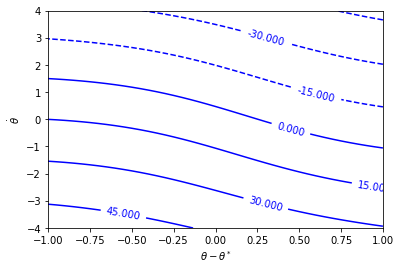

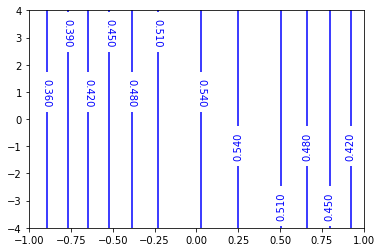

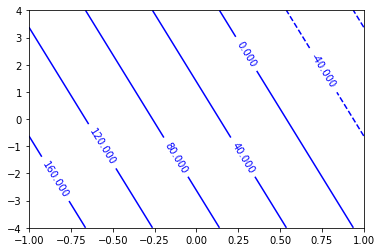

In [105]:
x5_eq = 0 
plt.figure()
CS = plt.contour(np.linspace(theta_bounds[0]-x5_eq, theta_bounds[1]-x5_eq, 41), np.linspace(thetadot_bounds[0], thetadot_bounds[1], 41), Lfhs, colors='blue')
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel(r'$\theta - \theta^*$')
plt.ylabel(r'$\dot{\theta}$')

plt.figure()
CS = plt.contour(np.linspace(theta_bounds[0]-x5_eq, theta_bounds[1]-x5_eq, 41), np.linspace(thetadot_bounds[0], thetadot_bounds[1], 41), Lghs, colors='blue')
plt.clabel(CS, inline=1, fontsize=10)
plt.show()

plt.figure()
CS = plt.contour(np.linspace(theta_bounds[0]-x5_eq, theta_bounds[1]-x5_eq, 41), np.linspace(thetadot_bounds[0], thetadot_bounds[1], 41), ahs, colors = 'blue')
plt.clabel(CS, inline=1, fontsize=10)
plt.show()



In [94]:
def findLip(Grid, t_grid, tdot_grid):
    Grid = np.array(Grid) 
    L_max = 0
    grid_space = [t_grid, tdot_grid] 
    for i in range(2): 
        for row in Grid: 
            for j in range(len(row)-1):
                L = np.abs((row[j+1] - row[j])/grid_space[i])
                if L >= L_max:
                    L_max = L
        Grid = Grid.transpose()
    return L_max

In [49]:
print 'L_Lfh ~= ' + str(findLip(Lfhs, (theta_bounds[1]-theta_bounds[0])/40.0, (thetadot_bounds[1]-thetadot_bounds[0])/40.0))
print 'L_Lgh ~= ' + str(findLip(Lghs, (theta_bounds[1]-theta_bounds[0])/40.0, (thetadot_bounds[1]-thetadot_bounds[0])/40.0))
print 'L_ah  ~= ' + str(findLip(ahs, (theta_bounds[1]-theta_bounds[0])/40.0, (thetadot_bounds[1]-thetadot_bounds[0])/40.0))

L_Lfh ~= 15.99427512538
L_Lgh ~= 0.24338437673585678
L_ah  ~= 100.00000000000057


In [54]:

import pandas as pd

In [58]:
out = pd.read_csv("../bags/gridded2/gridded2.csv")

In [69]:
out.stateVec[300:350]

300    [0.4999999999999996, 0.0, 0.0, 0.0, 0.0, 0.613...
301    [0.4499999999999996, 0.0, 0.0, 0.0, 0.0, 0.613...
302    [0.39999999999999963, 0.0, 0.0, 0.0, 0.0, 0.61...
303    [0.34999999999999964, 0.0, 0.0, 0.0, 0.0, 0.61...
304    [0.29999999999999966, 0.0, 0.0, 0.0, 0.0, 0.61...
305    [0.24999999999999967, 0.0, 0.0, 0.0, 0.0, 0.61...
306    [0.19999999999999968, 0.0, 0.0, 0.0, 0.0, 0.61...
307    [0.1499999999999997, 0.0, 0.0, 0.0, 0.0, 0.613...
308    [0.09999999999999969, 0.0, 0.0, 0.0, 0.0, 0.61...
309    [0.049999999999999684, 0.0, 0.0, 0.0, 0.0, 0.6...
310    [0.049999999999999684, 0.0, 0.0, 0.0, 0.0, 0.6...
311    [-3.191891195797325e-16, 0.0, 0.0, 0.0, 0.0, 0...
312    [-0.05000000000000032, 0.0, 0.0, 0.0, 0.0, 0.6...
313    [-0.10000000000000032, 0.0, 0.0, 0.0, 0.0, 0.6...
314    [-0.15000000000000033, 0.0, 0.0, 0.0, 0.0, 0.6...
315    [-0.20000000000000034, 0.0, 0.0, 0.0, 0.0, 0.6...
316    [-0.25000000000000033, 0.0, 0.0, 0.0, 0.0, 0.6...
317    [-0.3000000000000003, 0.